# 전처리 Preprocessing

#### References  
https://www.kaggle.com/competitions/amex-default-prediction/discussion/335892  
https://lovelydiary.tistory.com/409  
https://lovelydiary.tistory.com/417  
https://lovelydiary.tistory.com/419

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("C:/Users/kimch/Desktop/9565_hospital_data/train.csv")
test = pd.read_csv("C:/Users/kimch/Desktop/9565_hospital_data/test.csv")

In [4]:
train.rename(columns={'Profit1':"profit1", "Debt2":"debt2"}, inplace=True)

In [5]:
# bedCount
# pd.cut으로 100 단위로 나눔 
bins = [0, 30, 100, 200, 300, train["bedCount"].max()]
# 1: 30이하, 2: 30초과 100 이하, 3: 100초과 200이하, 4: 200초과 300이하, 5: 300초과 
labels = [1, 2, 3, 4, 5]
train["bedCount_class"] = pd.cut(train["bedCount"], bins, labels=labels)

In [6]:
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,3
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,5
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,5
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,5
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,4
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,NaN
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,3


# Missing Values 

In [7]:
# 결측치 0 -> NaN
trainNaN = train.replace(0, np.nan)

In [8]:
missingValues = pd.DataFrame(trainNaN.isnull().sum(), columns=["count"])
missingValues["percentage"] = round((missingValues["count"]/len(train)), 4)*100
missingValues = missingValues.sort_values(by="percentage", ascending=False)
missingValues = missingValues[missingValues["percentage"] > 0]
missingValues

,count,percentage
receivableL1,300,99.67
receivableL2,300,99.67
surplus2,214,71.10
surplus1,208,69.10
ctax2,144,47.84
shortLoan2,138,45.85
ctax1,137,45.51
shortLoan1,130,43.19
longLoan2,121,40.20
salescost2,114,37.87


<AxesSubplot:>

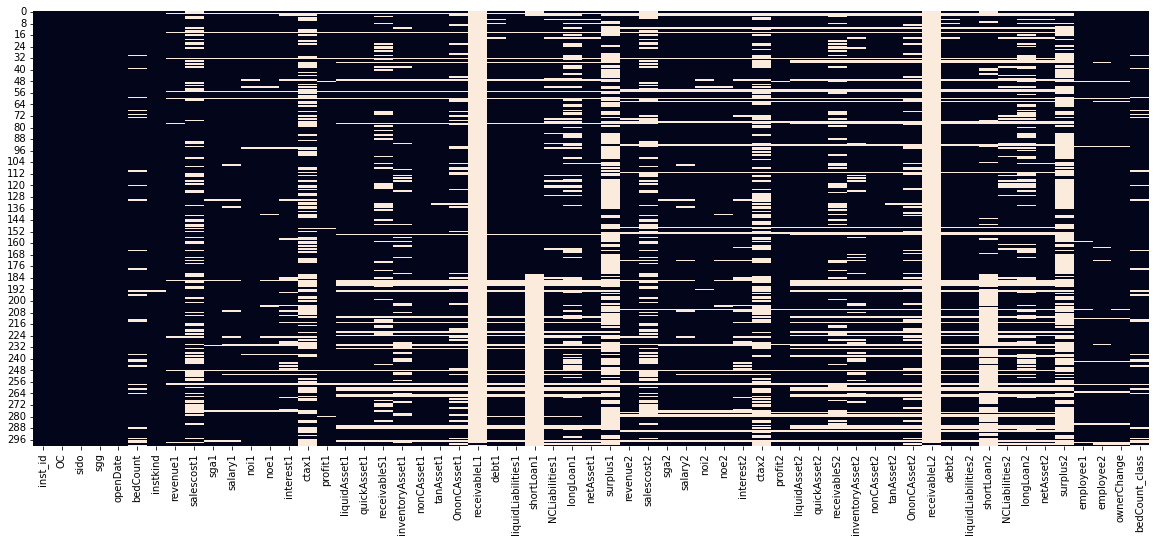

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(trainNaN.isnull(), cbar=False)

### 결측치 처리 가이드라인 
#### 가이드라인1
10% 미만: 삭제 or 대치  
10% ~ 20%: hot deck(매년자료->해당년도 자료 추정) or regression or model based imputation  
20% ~ 50%: regression or model based imputation  
50% 이상: 해당 칼럼(변수 자체 제거)  
#### 가이드라인2
10% 미만 : 삭제(결측치 있는 행) or 대치(imputation)  
10% 이상 20% 미만 : hot deck, regression, model based method  
20% 이상: model based method, regression  

In [10]:
# 아래 나오는 train들 결과변수인 OC 컬럼 제외한 것들임 

In [11]:
# 가이드라인1 따르면 (= 결측치 비율 50% 이상인 칼럼 삭제, 결측치 비율 10% 이하인 관측치 삭제하면) 33 rows x 55 columns 밖에 안남음

In [12]:
# trainNaN_1 : 가이드라인2 따른 것 -> 결측치 모두 다 대체

In [13]:
## 대체방법:
## interpolate 보간법 -> 시계열이라기엔 2016, 2017 데이터만 있어서 kNN 이용하기로 함 (imputing using kNN)
## kNN : 평균, 중앙값, 최빈값으로 대치하는 경우보다 더 정확할 때가 많지만 메모리가 많이 필요하고 이상치에 민감하다는 단점

kNN References : https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=222013171055

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=5)

In [11]:
# 결측치 존재하는 칼럼들 리스트 (범주형 변수인 instkind, bedCount_classsms, ownerChange는 제외시킴)
lst = ['receivableL2', 'receivableL1', 'surplus2', 'surplus1', 'ctax2', 'shortLoan2', 'ctax1', 'shortLoan1', 'longLoan2', 'salescost2',
       'longLoan1', 'salescost1', 'receivableS2', 'OnonCAsset2', 'receivableS1', 'inventoryAsset2', 'NCLiabilities2', 'OnonCAsset1',
       'inventoryAsset1', 'NCLiabilities1', 'netAsset2', 'debt2', 'tanAsset2', 'liquidLiabilities2', 'quickAsset2', 'liquidAsset2', 'nonCAsset2',
       'interest2', 'netAsset1', 'debt1', 'liquidLiabilities1', 'tanAsset1', 'salary2', 'nonCAsset1', 'quickAsset1', 'liquidAsset1', 'interest1',
       'noe2', 'noi2', 'revenue2', 'sga2', 'profit2', 'noe1', 'salary1', 'noi1', 'employee2', 'sga1', 'revenue1','profit1', 'employee1', 'bedCount']

In [12]:
trainNaN_except_lst = trainNaN.drop(columns=lst)

In [13]:
trainNaN_filled = imputer.fit_transform(trainNaN[lst])
trainNaN_filled_df = pd.DataFrame(trainNaN_filled, columns=lst)

In [14]:
trainNaN_1 = pd.concat([trainNaN_except_lst, trainNaN_filled_df], axis=1)

In [15]:
# 결측치들 다 값 대체해주니 범주형 변수들만 결측치 남음 
# bedCount_class는 채워진 bedCount로 채울 수 있음 
# 그 외에 ownerChange 와 instkind는 결측값있는 관측치 삭제해도 13개밖에 안되고 이거까지 대체하면 과적합 위험성도 있을 것 같아 삭제하기로

In [16]:
# bedCount 채워진 값 bedCount_class 값도 넣어주기
# pd.cut으로 100 단위로 나눔 
bins = [0, 30, 100, 200, 300, train["bedCount"].max()]
# 1: 30이하, 2: 30초과 100 이하, 3: 100초과 200이하, 4: 200초과 300이하, 5: 300초과 
labels = [1, 2, 3, 4, 5]
trainNaN_1["bedCount_class"] = pd.cut(trainNaN_1["bedCount"], bins, labels=labels)

In [17]:
trainNaN_1
# receivableL1, receivableL2 => 301개 중 300개가 결츨.. => 의미 관계있는 변수: ?? 
# => 삭제하는게 나을지도..? => feature selection에서 어차피 안뽑힙

,inst_id,OC,sido,sgg,openDate,instkind,ownerChange,bedCount_class,receivableL2,receivableL1,...,profit2,noe1,salary1,noi1,employee2,sga1,revenue1,profit1,employee1,bedCount
0,1,open,choongnam,73,20071228,nursing_hospital,same,3,65242310.0,73742310.0,...,2.078297e+08,1.523624e+07,2.033835e+09,15652441.0,64.0,3.961135e+09,4.217530e+09,2.251697e+08,62.0,175.0
1,3,open,gyeongnam,32,19970401,general_hospital,same,5,65242310.0,73742310.0,...,7.282944e+08,2.124670e+09,1.593359e+10,887514200.2,813.0,3.286397e+10,3.636872e+10,1.965303e+09,801.0,410.0
2,4,open,gyeonggi,89,20161228,nursing_hospital,same,5,65242310.0,73742310.0,...,1.786612e+07,3.000000e+04,2.964023e+08,76156.0,1.0,4.472197e+08,1.004522e+09,4.186475e+07,234.0,468.0
3,7,open,incheon,141,20000814,general_hospital,same,5,65242310.0,73742310.0,...,8.383875e+08,1.259568e+09,3.178605e+10,506223059.0,663.0,7.067740e+10,7.250734e+10,9.028303e+08,663.0,353.0
4,9,open,gyeongnam,32,20050901,general_hospital,same,3,65242310.0,73742310.0,...,3.264258e+07,1.419089e+09,2.446078e+10,112352259.0,197.0,4.765605e+10,4.904354e+10,8.074970e+07,206.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,nursing_hospital,same,4,65242310.0,73742310.0,...,-2.624151e+08,7.439421e+08,3.467861e+09,42098974.0,141.0,5.903119e+09,7.614697e+09,5.943868e+08,193.0,214.0
297,423,close,choongnam,159,20140618,hospital,same,4,65242310.0,73742310.0,...,1.308742e+08,1.398513e+08,3.715334e+09,186359.0,79.0,6.356265e+09,6.717144e+09,-1.622521e+09,79.0,254.8
298,426,close,gyeongbuk,107,19830705,hospital,NaN,3,65242310.0,73742310.0,...,-1.518272e+08,1.379810e+08,7.500000e+06,121022160.0,51.2,5.479428e+07,2.115977e+09,-7.175308e+07,133.2,170.0
299,427,close,gyeonggi,169,20070101,nursing_hospital,NaN,3,65242310.0,73742310.0,...,-2.729675e+09,5.366919e+08,2.231944e+09,123665065.0,334.4,3.286245e+09,2.116892e+09,-1.850554e+09,100.0,180.0


In [18]:
missingValues = pd.DataFrame(trainNaN_1.isnull().sum(), columns=["count"])
missingValues["percentage"] = round((missingValues["count"]/len(trainNaN_1)), 4)*100
missingValues = missingValues.sort_values(by="percentage", ascending=False)
missingValues = missingValues[missingValues["percentage"] > 0]
missingValues

,count,percentage
ownerChange,12,3.99
instkind,1,0.33


<AxesSubplot:>

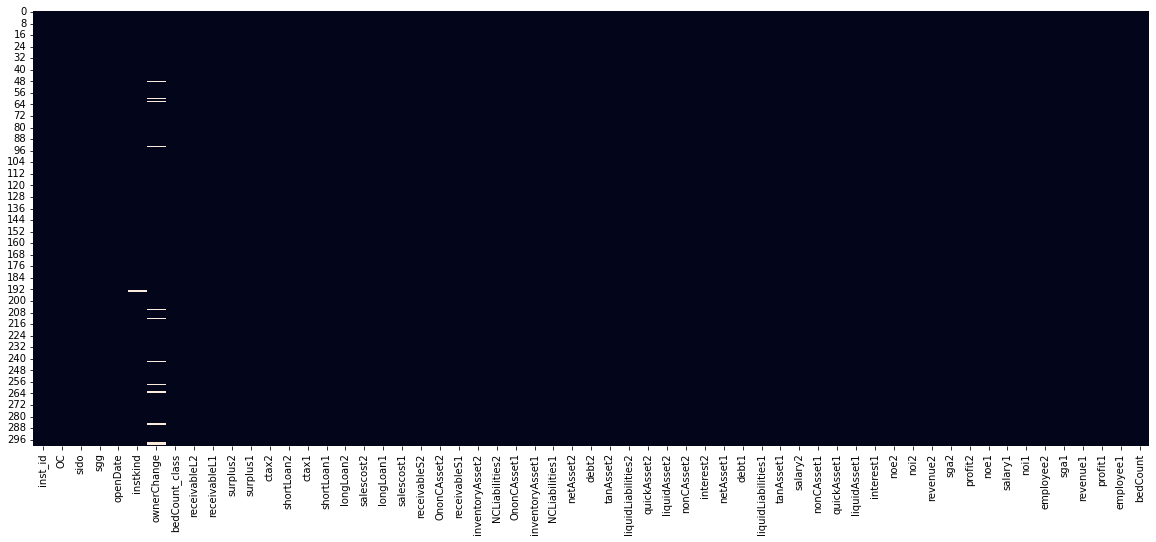

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(trainNaN_1.isnull(), cbar=False)

In [20]:
trainNaN_1 = trainNaN_1.dropna(subset=["instkind", "ownerChange"])

In [21]:
# trainNaN_! : 결측치 처리한 데이터프레임
trainNaN_1

,inst_id,OC,sido,sgg,openDate,instkind,ownerChange,bedCount_class,receivableL2,receivableL1,...,profit2,noe1,salary1,noi1,employee2,sga1,revenue1,profit1,employee1,bedCount
0,1,open,choongnam,73,20071228,nursing_hospital,same,3,65242310.0,73742310.0,...,2.078297e+08,1.523624e+07,2.033835e+09,15652441.0,64.0,3.961135e+09,4.217530e+09,2.251697e+08,62.0,175.0
1,3,open,gyeongnam,32,19970401,general_hospital,same,5,65242310.0,73742310.0,...,7.282944e+08,2.124670e+09,1.593359e+10,887514200.2,813.0,3.286397e+10,3.636872e+10,1.965303e+09,801.0,410.0
2,4,open,gyeonggi,89,20161228,nursing_hospital,same,5,65242310.0,73742310.0,...,1.786612e+07,3.000000e+04,2.964023e+08,76156.0,1.0,4.472197e+08,1.004522e+09,4.186475e+07,234.0,468.0
3,7,open,incheon,141,20000814,general_hospital,same,5,65242310.0,73742310.0,...,8.383875e+08,1.259568e+09,3.178605e+10,506223059.0,663.0,7.067740e+10,7.250734e+10,9.028303e+08,663.0,353.0
4,9,open,gyeongnam,32,20050901,general_hospital,same,3,65242310.0,73742310.0,...,3.264258e+07,1.419089e+09,2.446078e+10,112352259.0,197.0,4.765605e+10,4.904354e+10,8.074970e+07,206.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,419,open,gyeongnam,174,20101104,nursing_hospital,same,5,65242310.0,73742310.0,...,1.036651e+09,1.151424e+09,5.691328e+09,49773739.0,180.0,9.521440e+09,1.207963e+10,4.788074e+08,180.0,367.0
295,420,open,gyeonggi,177,20110523,nursing_hospital,same,4,65242310.0,73742310.0,...,2.466403e+08,3.831812e+08,2.653680e+09,62681034.0,66.0,4.883855e+09,5.500472e+09,2.456945e+08,62.0,254.8
296,422,open,jeonnam,178,20050211,nursing_hospital,same,4,65242310.0,73742310.0,...,-2.624151e+08,7.439421e+08,3.467861e+09,42098974.0,141.0,5.903119e+09,7.614697e+09,5.943868e+08,193.0,214.0
297,423,close,choongnam,159,20140618,hospital,same,4,65242310.0,73742310.0,...,1.308742e+08,1.398513e+08,3.715334e+09,186359.0,79.0,6.356265e+09,6.717144e+09,-1.622521e+09,79.0,254.8


In [22]:
missingValues = pd.DataFrame(trainNaN_1.isnull().sum(), columns=["count"])
missingValues["percentage"] = round((missingValues["count"]/len(trainNaN_1)), 4)*100
missingValues = missingValues.sort_values(by="percentage", ascending=False)
missingValues = missingValues[missingValues["percentage"] > 0]
missingValues

,count,percentage


# Scaling

## 수치형 변수 : StandardScaler(표준화)

In [23]:
from sklearn import preprocessing

In [24]:
trainNaN_1.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'instkind', 'ownerChange',
       'bedCount_class', 'receivableL2', 'receivableL1', 'surplus2',
       'surplus1', 'ctax2', 'shortLoan2', 'ctax1', 'shortLoan1', 'longLoan2',
       'salescost2', 'longLoan1', 'salescost1', 'receivableS2', 'OnonCAsset2',
       'receivableS1', 'inventoryAsset2', 'NCLiabilities2', 'OnonCAsset1',
       'inventoryAsset1', 'NCLiabilities1', 'netAsset2', 'debt2', 'tanAsset2',
       'liquidLiabilities2', 'quickAsset2', 'liquidAsset2', 'nonCAsset2',
       'interest2', 'netAsset1', 'debt1', 'liquidLiabilities1', 'tanAsset1',
       'salary2', 'nonCAsset1', 'quickAsset1', 'liquidAsset1', 'interest1',
       'noe2', 'noi2', 'revenue2', 'sga2', 'profit2', 'noe1', 'salary1',
       'noi1', 'employee2', 'sga1', 'revenue1', 'profit1', 'employee1',
       'bedCount'],
      dtype='object')

In [25]:
# bedCount 제거, 'inst_id', 'OC', 'sido', 'sgg', 'openDate', 'instkind', 'ownerChange','bedCount_class' 범주형이므로 제외
norm_lst = ['receivableL2', 'receivableL1', 'surplus2','surplus1', 'ctax2', 'shortLoan2', 'ctax1', 'shortLoan1', 'longLoan2',
       'salescost2', 'longLoan1', 'salescost1', 'receivableS2', 'OnonCAsset2','receivableS1', 'inventoryAsset2', 'NCLiabilities2', 'OnonCAsset1',
       'inventoryAsset1', 'NCLiabilities1', 'netAsset2', 'debt2', 'tanAsset2', 'liquidLiabilities2', 'quickAsset2', 'liquidAsset2', 'nonCAsset2',
       'interest2', 'netAsset1', 'debt1', 'liquidLiabilities1', 'tanAsset1', 'salary2', 'nonCAsset1', 'quickAsset1', 'liquidAsset1', 'interest1',
       'noe2', 'noi2', 'revenue2', 'sga2', 'profit2', 'noe1', 'salary1', 'noi1', 'employee2', 'sga1', 'revenue1', 'profit1', 'employee1']

In [36]:
# 수치형변수들 정규화
# trainNorm: 결측치 처리한 trainNaN_1을 
scaler = preprocessing.StandardScaler()
scaler.fit(trainNaN_1[norm_lst])
trainNorm = pd.concat([pd.DataFrame(scaler.transform(trainNaN_1[norm_lst]), columns=norm_lst, index=trainNaN_1.index), 
                       trainNaN_1[['inst_id', 'sido', 'sgg', 'openDate', 'instkind', 'ownerChange','bedCount_class', 'OC']]], axis=1)
# inst_id를 index로
trainNorm = trainNorm.set_index("inst_id")
# openDate를 DatetimeIndex로
trainNorm["openDate"] = pd.to_datetime(trainNorm.openDate, format="%Y%m%d")
trainNorm

,receivableL2,receivableL1,surplus2,surplus1,ctax2,shortLoan2,ctax1,shortLoan1,longLoan2,salescost2,...,revenue1,profit1,employee1,sido,sgg,openDate,instkind,ownerChange,bedCount_class,OC
inst_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,-0.209895,-0.137869,-0.308212,-0.647335,-0.343574,-0.663606,-0.799511,-0.307560,...,-0.455042,-0.010875,-0.514711,choongnam,73,2007-12-28,nursing_hospital,same,3,open
3,0.0,0.0,3.101304,0.033384,1.577260,1.047790,1.867004,1.048615,1.301796,1.197795,...,1.070372,1.509076,4.086866,gyeongnam,32,1997-04-01,general_hospital,same,5,open
4,0.0,0.0,-0.399130,-0.259198,-0.365999,-0.577650,-0.429293,-0.645358,-0.827345,-0.363705,...,-0.607483,-0.170986,0.556292,gyeonggi,89,2016-12-28,nursing_hospital,same,5,open
7,0.0,0.0,1.111344,0.693890,0.495240,2.129929,0.214939,5.021416,2.456929,1.348615,...,2.784971,0.581040,3.227573,incheon,141,2000-08-14,general_hospital,same,5,open
9,0.0,0.0,1.373713,0.738332,1.069473,4.770857,1.836048,4.448451,2.237330,1.088864,...,1.671729,-0.137022,0.381943,gyeongnam,32,2005-09-01,general_hospital,same,3,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,0.0,-0.117475,-0.111077,-0.157973,-0.688793,1.287897,0.161265,0.418056,-0.300176,...,-0.082024,0.210669,0.220047,gyeongnam,174,2010-11-04,nursing_hospital,same,5,open
420,0.0,0.0,-0.136253,-0.128382,-0.177030,-0.442002,-0.269774,-0.454432,-0.487371,-0.314802,...,-0.394173,0.007052,-0.514711,gyeonggi,177,2011-05-23,nursing_hospital,same,4,open
422,0.0,0.0,-0.303752,-0.148385,-0.176499,-0.355712,-0.246450,-0.228796,0.426911,-0.322649,...,-0.293863,0.311624,0.300995,jeonnam,178,2005-02-11,nursing_hospital,same,4,open


## 범주형 변수 : 

In [31]:
# sido -> 북도, 남도, 특별시 등 묶어줌 / sgg -> 흠... 굳이...? 삭제해도 될듯..? 
# instkind는 데이콘에서 변수 설명도 해줬고 bedCount랑 겹치는 정보도 있는 듯함
# ownerChange는 change 1, same 0 으로 변환해줌 
# 결과변수 OC도 open: 1, close: 0으로

In [32]:
# sido

In [46]:
trainNorm = trainNorm.replace({"sido":("choongbuk","choongnam", "sejong", "daejeon")}, "choongchung")

In [47]:
trainNorm = trainNorm.replace({"sido":("gyeongbuk", "gyeongnam", "ulsan", "busan", "daegu")}, "gyeongsang")

In [50]:
trainNorm = trainNorm.replace({"sido":("jeonbuk", "jeonnam", "gwangju")}, "jeonra")

In [52]:
trainNorm = trainNorm.replace({"sido":("gyeonggi", "incheon")}, "gyeongin")

In [53]:
sido = trainNorm[["sido", "OC"]]
sido_pivot = pd.pivot_table(sido, index="sido", columns="OC", aggfunc=len, margins=True)
sido_pivot

OC,close,open,All
sido,,,
choongchung,1.0,49.0,50
gangwon,NaN,8.0,8
gyeongin,3.0,54.0,57
gyeongsang,1.0,114.0,115
jeonra,4.0,36.0,40
seoul,1.0,17.0,18
All,10.0,278.0,288


In [34]:
# sgg

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
## sgg -> 특정 sgg에서 조사한 병원이 딱 1갠데 그 병원이 폐업한 경우 외에는 특별히 close 많이 한 sgg 없었음 -> 삭제해도 되지 않을까? 
sgg = train[["sgg", "OC"]]
sgg_pivot = pd.pivot_table(sgg, index="sgg", columns="OC", aggfunc=len, margins=True)
sgg_pivot = sgg_pivot.sort_values(by="All", ascending=False)
sgg_pivot

OC,close,open,All
sgg,,,
All,15.0,286.0,301
32,NaN,13.0,13
114,1.0,5.0,6
26,1.0,5.0,6
169,2.0,4.0,6
8,NaN,6.0,6
94,NaN,5.0,5
37,NaN,5.0,5
96,NaN,4.0,4


In [56]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [57]:
## sgg 삭제
trainNorm = trainNorm.drop(columns=["sgg"])

In [58]:
# ownerChange

In [59]:
## same: 0, change: 1로 변경
trainNorm.loc[trainNorm["ownerChange"]=="same","ownerChange"] = 0
trainNorm.loc[trainNorm["ownerChange"]=="change","ownerChange"] = 1 

In [40]:
# OC

In [67]:
## close: 0, open: 1로 변경
trainNorm.loc[trainNorm["OC"]==" close", "OC"] = 0
trainNorm.loc[trainNorm["OC"]=="open", "OC"] = 1

In [61]:
# instkind

In [62]:
# instkind 별 bedCount 값 확인해봄
# -> 종합병원: 100명 이상, 병원: 30 ~ 100명 , 의원: 30명 이하 -> boxplot 그려진거 보니 꼭 들어맞지는 않는 듯? 
# clinic: 의원, dental_clinic: 치과의원, traditional_clinic: 한의원 -> 30명 이하
# traditional_hospital: 한방병원, hospital 중 일부 -> 30~ 100명 
# genral_hospital: 종합병원 , hospital 중 일부, nursing_hospital: 요양병원 -> 100명 이상

In [63]:
kind_bedCount = train[["instkind", "bedCount"]]

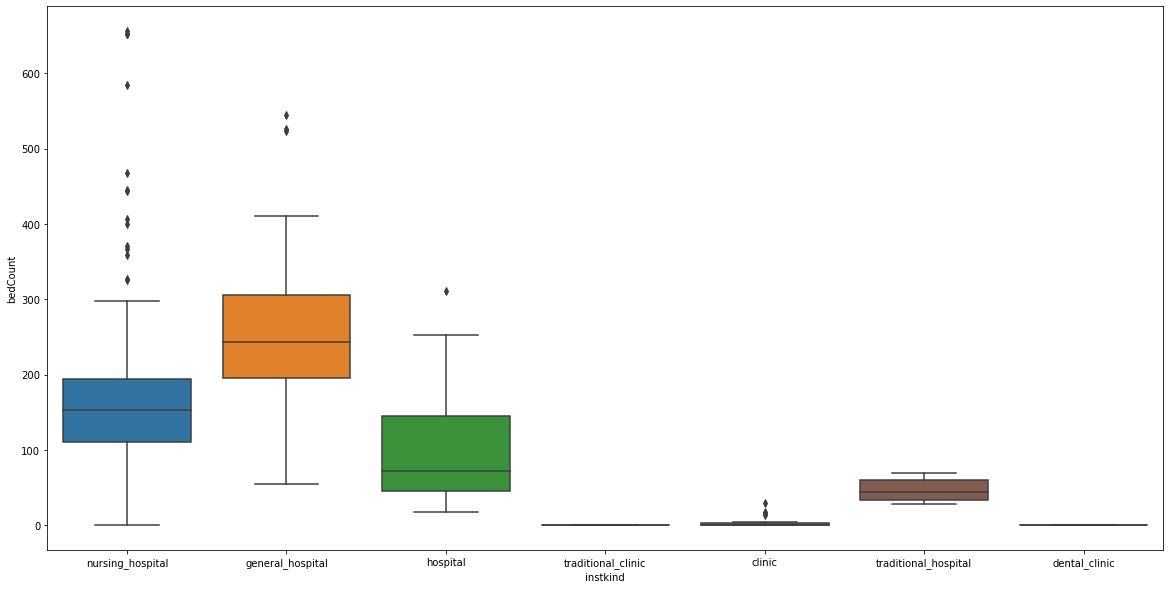

In [64]:
plt.figure(figsize=(20,10))

sns.boxplot(x="instkind", y="bedCount", data=kind_bedCount)

plt.show()

In [68]:
categorical = ["sido", "instkind","ownerChange"]
train[categorical] = train[categorical].astype("category")

In [69]:
trainNorm

,receivableL2,receivableL1,surplus2,surplus1,ctax2,shortLoan2,ctax1,shortLoan1,longLoan2,salescost2,...,sga1,revenue1,profit1,employee1,sido,openDate,instkind,ownerChange,bedCount_class,OC
inst_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,-0.209895,-0.137869,-0.308212,-0.647335,-0.343574,-0.663606,-0.799511,-0.307560,...,-0.455158,-0.455042,-0.010875,-0.514711,choongchung,2007-12-28,nursing_hospital,0,3,1
3,0.0,0.0,3.101304,0.033384,1.577260,1.047790,1.867004,1.048615,1.301796,1.197795,...,1.430071,1.070372,1.509076,4.086866,gyeongsang,1997-04-01,general_hospital,0,5,1
4,0.0,0.0,-0.399130,-0.259198,-0.365999,-0.577650,-0.429293,-0.645358,-0.827345,-0.363705,...,-0.684359,-0.607483,-0.170986,0.556292,gyeongin,2016-12-28,nursing_hospital,0,5,1
7,0.0,0.0,1.111344,0.693890,0.495240,2.129929,0.214939,5.021416,2.456929,1.348615,...,3.896508,2.784971,0.581040,3.227573,gyeongin,2000-08-14,general_hospital,0,5,1
9,0.0,0.0,1.373713,0.738332,1.069473,4.770857,1.836048,4.448451,2.237330,1.088864,...,2.394907,1.671729,-0.137022,0.381943,gyeongsang,2005-09-01,general_hospital,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,0.0,-0.117475,-0.111077,-0.157973,-0.688793,1.287897,0.161265,0.418056,-0.300176,...,-0.092479,-0.082024,0.210669,0.220047,gyeongsang,2010-11-04,nursing_hospital,0,5,1
420,0.0,0.0,-0.136253,-0.128382,-0.177030,-0.442002,-0.269774,-0.454432,-0.487371,-0.314802,...,-0.394973,-0.394173,0.007052,-0.514711,gyeongin,2011-05-23,nursing_hospital,0,4,1
422,0.0,0.0,-0.303752,-0.148385,-0.176499,-0.355712,-0.246450,-0.228796,0.426911,-0.322649,...,-0.328490,-0.293863,0.311624,0.300995,jeonra,2005-02-11,nursing_hospital,0,4,1


In [47]:
# sido, instkind는 선형모델 돌릴 경우 원핫인코딩으로 해주면 될 듯
# 원핫인코딩
# -> 구현이 쉽고 가장 정확
# -> 계산 측면에서 비효율적이고 범주 수가 증가하는 경우에 적합 X, 선형 모델 외에는 적합 X, 대규모 데이터셋일 경우 대규모 분산 최적화 요함
# 찾아보니깐 정확히 잘 모르겠고 get_dummies랑 비슷한 것 같아서 그냥 get_dummies 씀

In [48]:
# sido, instkind 원핫인코딩 

In [ ]:
# trainNorm_dummies : trainNorm에서 범주형 변수인 sido, instkind get_dummies한 것 

In [74]:
trainNorm_dummies = pd.get_dummies(trainNorm, columns=["sido", "instkind"], prefix_sep="_", drop_first=True)
trainNorm_dummies

,receivableL2,receivableL1,surplus2,surplus1,ctax2,shortLoan2,ctax1,shortLoan1,longLoan2,salescost2,...,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital
inst_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,-0.209895,-0.137869,-0.308212,-0.647335,-0.343574,-0.663606,-0.799511,-0.307560,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,3.101304,0.033384,1.577260,1.047790,1.867004,1.048615,1.301796,1.197795,...,0,1,0,0,0,1,0,0,0,0
4,0.0,0.0,-0.399130,-0.259198,-0.365999,-0.577650,-0.429293,-0.645358,-0.827345,-0.363705,...,1,0,0,0,0,0,0,1,0,0
7,0.0,0.0,1.111344,0.693890,0.495240,2.129929,0.214939,5.021416,2.456929,1.348615,...,1,0,0,0,0,1,0,0,0,0
9,0.0,0.0,1.373713,0.738332,1.069473,4.770857,1.836048,4.448451,2.237330,1.088864,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,0.0,-0.117475,-0.111077,-0.157973,-0.688793,1.287897,0.161265,0.418056,-0.300176,...,0,1,0,0,0,0,0,1,0,0
420,0.0,0.0,-0.136253,-0.128382,-0.177030,-0.442002,-0.269774,-0.454432,-0.487371,-0.314802,...,1,0,0,0,0,0,0,1,0,0
422,0.0,0.0,-0.303752,-0.148385,-0.176499,-0.355712,-0.246450,-0.228796,0.426911,-0.322649,...,0,0,1,0,0,0,0,1,0,0


# Oversampling 

References  
http://www.incodom.kr/SMOTE

In [75]:
trainNorm['OC'].value_counts()

1    278
0     10
Name: OC, dtype: int64

In [ ]:
# open에 비해서 close가 매우 적음 -> oversampling 해줘야함
# SMOTE: 대표적인 오버샘플링 기법 중 하나, 낮은 비율로 존재하는 클래스의 데이터를 kNN 알고리즘 활용하여 새롭게 생성
# 알고리즘 기반으로 데이터를 생성, 과적합 발생 가능성이 단순 무작위 방법보다 적음

In [78]:
!pip install imbalanced-learn

In [79]:
from imblearn.over_sampling import SMOTE

In [88]:
trainNorm_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 428
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   receivableL2                   288 non-null    float64       
 1   receivableL1                   288 non-null    float64       
 2   surplus2                       288 non-null    float64       
 3   surplus1                       288 non-null    float64       
 4   ctax2                          288 non-null    float64       
 5   shortLoan2                     288 non-null    float64       
 6   ctax1                          288 non-null    float64       
 7   shortLoan1                     288 non-null    float64       
 8   longLoan2                      288 non-null    float64       
 9   salescost2                     288 non-null    float64       
 10  longLoan1                      288 non-null    float64       
 11  salescost1         

In [89]:
columns = ["ownerChange", "bedCount_class", "OC"]
trainNorm_dummies[columns] = trainNorm_dummies[columns].astype('int')

In [92]:
smote = SMOTE(random_state=42)
train_X = trainNorm_dummies.drop(columns=["OC", "openDate"])  # openDate 자료형이 datetime이어서 오버샘플링할 때 지워줌 
train_y = trainNorm_dummies["OC"]
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y)

In [95]:
train_y.value_counts()

1    278
0     10
Name: OC, dtype: int64

In [96]:
train_y_smote.value_counts()

1    278
0    278
Name: OC, dtype: int64

# 변수 선택 Feature Selection

References  
https://www.kaggle.com/code/sz8416/6-ways-for-feature-selection/notebook

In [97]:
from sklearn.feature_selection import SelectFromModel

In [98]:
# LogisticRegression : Normalization: O / Impute Missing values: O  => trainNorm으로 오버샘플링한 것 : train_X_smote, train_y_smote
from sklearn.linear_model import LogisticRegression

In [103]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"))
embeded_lr_selector.fit(train_X_smote, train_y_smote)

SelectFromModel(estimator=LogisticRegression())

In [105]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_X_smote.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), "selected features")

21 selected features


In [109]:
# RandomForest : Normalization: X / Impute Missing values : O  => 그냥 train_X_smote로 돌려봄 / trainNaN_1
from sklearn.ensemble import RandomForestClassifier

In [112]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="1.25*median")
embeded_rf_selector.fit(train_X_smote, train_y_smote)

SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [113]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_X_smote.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_rf_support)), "selected features")

63 selected features


In [116]:
# LightGBM : Normalization: X / Impute Missing values : X  => 그냥 train_X_smote로 돌려봄 / train
!pip install lightgbm
from lightgbm import LGBMClassifier

In [117]:
lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2, reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, threshold="1.25*median")
embeded_lgb_selector.fit(train_X_smote, train_y_smote)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [119]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = train_X_smote.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), "selected features")

27 selected features


In [122]:
features = train_X_smote.columns.tolist()

In [123]:
# Summary
pd.set_option('display.max_rows', None)

feature_selection_df = pd.DataFrame({"Feature": features, "Logistic": embeded_lr_support, "RandomForest": embeded_rf_support, "LightGBM": embeded_lgb_support})
feature_selection_df["Total"] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(["Total", "Feature"], ascending=False)
feature_selection_df

,Feature,Logistic,RandomForest,LightGBM,Total
3,surplus1,True,True,True,3
7,shortLoan1,True,True,True,3
39,revenue2,True,True,True,3
41,profit2,True,True,True,3
15,inventoryAsset2,True,True,True,3
45,employee2,True,True,True,3
54,sido_gyeongsang,True,True,False,2
5,shortLoan2,False,True,True,2
40,sga2,False,True,True,2
11,salescost1,True,False,True,2


# Model

References : https://mac-user-guide.tistory.com/171

배깅)   
-RandomForest : Normalization: X / Impute Missing values : O    
부스팅)   
-XGBoost :   
-> decision tree(의사결정나무)를 조합해서 사용하는 앙상블 기법 중 하나  
-> 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형  
-LightGBM : Normalization: X / Impute Missing values : X    
-> 작은 데이터셋을 사용할 경우, 과적합의 위험이 있음 (작은 데이터셋 : 10000개 이하)   
ensemble : ?/